In [13]:
def biggest_odd(x):
    largest_odd = -1

    for digit in str(x):
        if int(digit) % 2 != 0 and int(digit) > largest_odd:
            largest_odd = int(digit)

    return largest_odd

print(biggest_odd(23569))

9


In [1]:
def count_dots(s):
    counts=s.count('.')
    return counts
print(count_dots('h.e.l.p'))

3


In [2]:
def equal_string(x, y):
    x= len(x) 
    y=len(y)
    if x == y:
        return True
    else :
        return False
print(equal_string('love','evol'))

True


In [5]:
def swap_values(A, B):
    A=B
    B=C
    C=A
    return B
print(swap_values(                                                                 12,13))



UnboundLocalError: local variable 'C' referenced before assignment

In [6]:
import tweepy
import csv
import matplotlib.pyplot as plt

# Twitter API credentials
consumer_key = "gRzAHirJ8HVRuCaQsg1QtVGnF"
consumer_secret = "bhjUbbjZYhGTEwNSe4iSQOjlnDrYl1tTHGha31SNZTxe2DYcVT"
access_token = "1485343579300114436-dWN3AfrvnCAtkDTdxrSsflVO4Toj7D"
access_token_secret = "7ew4tqj2vCGBaByDMnFVjclcnyaFN194LQIKRncPE8pUH"

# Authenticate to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tweepy.API(auth)

# Define search parameters
query = "Kenya"
date_since = "2023-01-01"
date_until = "2023-01-31"

# Scrape tweets
#tweets = tweepy.Cursor(api.search, q=query, lang="en", since=date_since, until=date_until).items()

# Scrape tweets
#tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en").items()

tweets = api.home_timeline(count=200)  # Adjust the count as per your requirements

# Extract timestamps and count mentions
mentions = {}
for tweet in tweets:
    timestamp = tweet.created_at.date()
    if date_since <= str(timestamp) <= date_until:
        mentions[timestamp] = mentions.get(timestamp, 0) + 1


csv_file="mentions01-31-jan-2023.csv"
with open(csv_file, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Mentions"])
    for timestamp, count in mentions.items():
        writer.writerow([timestamp, count])


print(f" scraped data saved to {csv_file}.")

# Prepare data for line graph
timestamps = sorted(mentions.keys())
mention_counts = [mentions[timestamp] for timestamp in timestamps]

# Create line graph
plt.plot(timestamps, mention_counts)
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.title("Kenya Mentions on Twitter (January 2023)")
plt.xticks(rotation=45)
plt.show()


Forbidden: 403 Forbidden
453 - You currently have access to Twitter API v2 endpoints and limited v1.1 endpoints only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [12]:
from selenium import webdriver
import time
import csv
import matplotlib.pyplot as plt

# Set up Selenium and Chrome WebDriver
driver = webdriver.Chrome('service=service')  # Replace with the path to your chromedriver executable

# Open Twitter and search for Kenya mentions
search_query = "Kenya"
date_since = "2023-01-01"
date_until = "2023-01-31"

twitter_url = f"https://twitter.com/search?q={search_query}%20since%3A{date_since}%20until%3A{date_until}&src=typed_query"
driver.get(twitter_url)

# Scroll down to load more tweets (adjust the number of scrolls as needed)
num_scrolls = 3
for _ in range(num_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Extract timestamps and count mentions
tweets = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')
mentions = {}
for tweet in tweets:
    timestamp = tweet.find_element_by_xpath('.//time').get_attribute("datetime")
    timestamp = timestamp[:10]  # Extract only the date part
    mentions[timestamp] = mentions.get(timestamp, 0) + 1

# Save data to a CSV file
csv_file = "kenya_mentions.csv"
with open(csv_file, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Mentions"])
    for timestamp, count in mentions.items():
        writer.writerow([timestamp, count])

print(f"Scraped data saved to {csv_file}.")

# Close the Selenium driver
driver.quit()

# Prepare data for line graph
timestamps = sorted(mentions.keys())
mention_counts = [mentions[timestamp] for timestamp in timestamps]

# Create line graph
plt.plot(timestamps, mention_counts)
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.title("Kenya Mentions on Twitter (January 2023)")
plt.xticks(rotation=45)
plt.show()


/var/folders/_m/s1lh0gk140d20ctk_ggxnjs80000gn/T/ipykernel_1679/2702272892.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('service=service')  # Replace with the path to your chromedriver executable


AttributeError: 'WebDriver' object has no attribute 'find_elements_by_xpath'

/var/folders/_m/s1lh0gk140d20ctk_ggxnjs80000gn/T/ipykernel_1679/3869837920.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable


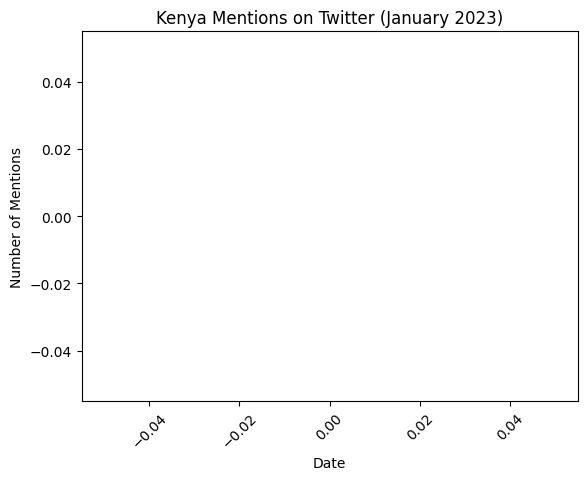

Scraping completed. Data saved to kenya_mentions.csv.


In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv
import matplotlib.pyplot as plt

# Set up Selenium and Chrome WebDriver
driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable

# Open Twitter and search for Kenya mentions
search_query = "Kenya"
date_since = "2023-01-01"
date_until = "2023-01-31"

twitter_url = f"https://twitter.com/search?q={search_query}%20since%3A{date_since}%20until%3A{date_until}&src=typed_query"
driver.get(twitter_url)

# Scroll down to load more tweets (adjust the number of scrolls as needed)
num_scrolls = 3
for _ in range(num_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Extract timestamps and count mentions
tweets = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="tweet"]')
mentions = {}
for tweet in tweets:
    timestamp = tweet.find_element(By.CSS_SELECTOR, 'time').get_attribute("datetime")
    timestamp = timestamp[:10]  # Extract only the date part
    mentions[timestamp] = mentions.get(timestamp, 0) + 1
    print(timestamp, mentions[timestamp])

# Close the Selenium driver
driver.quit()

# Prepare data for line graph
timestamps = sorted(mentions.keys())
mention_counts = [mentions[timestamp] for timestamp in timestamps]

# Create line graph
plt.plot(timestamps, mention_counts)
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.title("Kenya Mentions on Twitter (January 2023)")
plt.xticks(rotation=45)
plt.show()

# Save data to CSV file
csv_file = "kenya_mentions.csv"
with open(csv_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Mentions"])
    for timestamp, count in mentions.items():
        writer.writerow([timestamp, count])
        print(timestamp, count)

print(f"Scraping completed. Data saved to {csv_file}.")


/var/folders/_m/s1lh0gk140d20ctk_ggxnjs80000gn/T/ipykernel_1679/4013252616.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable


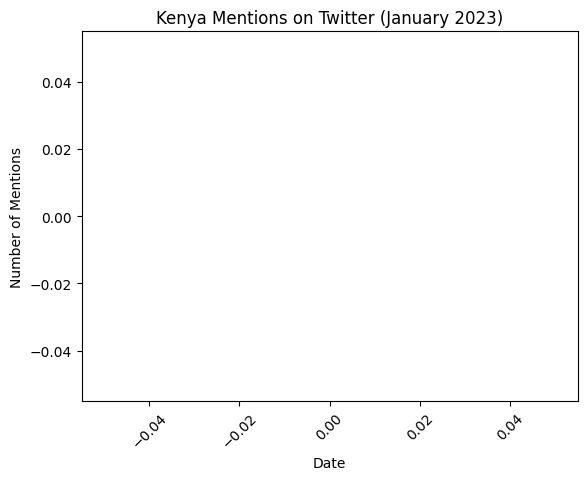

NameError: name 'timestamp' is not defined

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv
import matplotlib.pyplot as plt

# Set up Selenium and Chrome WebDriver
driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable

# Open Twitter and search for Kenya mentions
search_query = "Kenya"
date_since = "2023-01-01"
date_until = "2023-01-31"

twitter_url = f"https://twitter.com/search?q={search_query}%20since%3A{date_since}%20until%3A{date_until}&src=typed_query"
driver.get(twitter_url)

# Scroll down to load more tweets (adjust the number of scrolls as needed)
num_scrolls = 5  # Increase the number of scrolls to load more tweets
for _ in range(num_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Extract timestamps and count mentions
tweets = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="tweet"]')
mentions = {}
for tweet in tweets:
    timestamp = tweet.find_element(By.CSS_SELECTOR, 'time').get_attribute("datetime")
    timestamp = timestamp[:10]  # Extract only the date part
    print("Timestamp:", timestamp)
    mentions[timestamp] = mentions.get(timestamp, 0) + 1


# Close the Selenium driver
driver.quit()

# Prepare data for line graph
timestamps = sorted(mentions.keys())
mention_counts = [mentions[timestamp] for timestamp in timestamps]

# Create line graph
plt.plot(timestamps, mention_counts)
plt.xlabel("Date")
plt.ylabel("Number of Mentions")
plt.title("Kenya Mentions on Twitter (January 2023)")
plt.xticks(rotation=45)
plt.show()

# Save data to CSV file
csv_file = "kenya_mentions.csv"
with open(csv_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Mentions"])
    for timestamp, count in mentions.items():
        writer.writerow([timestamp, count])
    print("Writing to CSV:", timestamp, count)


print(f"Scraping completed. Data saved to {csv_file}.")
print("Number of tweets:", len(tweets))



In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv

# Set up Selenium and Chrome WebDriver
driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable

# Open Twitter and search for Kenya mentions
search_query = "Kenya"
date_since = "2023-01-01"
date_until = "2023-01-31"

twitter_url = f"https://twitter.com/search?q={search_query}%20since%3A{date_since}%20until%3A{date_until}&src=typed_query"
driver.get(twitter_url)

# Scroll down to load more tweets (adjust the number of scrolls as needed)
num_scrolls = 3
for _ in range(num_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Extract timestamps and count mentions
tweets = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="tweet"]')
mentions = {}
for tweet in tweets:
    timestamp = tweet.find_element(By.CSS_SELECTOR, 'time').get_attribute("datetime")
    timestamp = timestamp[:10]  # Extract only the date part
    mentions[timestamp] = mentions.get(timestamp, 0) + 1

# Close the Selenium driver
driver.quit()

# Prepare data for CSV file
timestamps = sorted(mentions.keys())
mention_counts = [mentions[timestamp] for timestamp in timestamps]

# Save data to a CSV file
csv_file = "kenya_mentions.csv"
with open(csv_file, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Mentions"])
    for timestamp, count in mentions.items():
        writer.writerow([timestamp, count])
        print("Writing to CSV:", timestamp, count)

print(f"Scraping completed. Data saved to {csv_file}.")


/var/folders/_m/s1lh0gk140d20ctk_ggxnjs80000gn/T/ipykernel_1679/2694235028.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('path_to_chromedriver')  # Replace with the path to your chromedriver executable


Scraping completed. Data saved to kenya_mentions.csv.
